In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('K:/Google Drive/DOUTORADO/Tese 2.0/Chapter I/KELLOGs/dataset.csv')

columns_to_plot = ['As', 'Ba', 'Cd', 'Co', 'Cr', 'Cu', 'Pb', 'Zn', 'Mo']

for col in columns_to_plot:
    data = data.sort_values(by=col,ascending=False)
    data = data[5:]

In [3]:
print(data.shape)

full_data = pd.read_csv("K:/Google Drive/DATA_SCIENCE/Spectroscopy/OSSL/Kellogg Soil Survey Laboratory/soillab.data.csv", low_memory=False)

full_data = full_data[full_data['id.layer_uuid_c'].isin(data['id.layer_uuid_c'])]

filter_data = full_data[[
'id.layer_uuid_c',
'c.tot_usda.4h2_wpct', 
'cec.ext_usda.4b1_cmolkg',
'sand.tot_usda.3a1_wpct', 
'silt.tot_usda.3a1_wpct', 
'clay.tot_usda.3a1_wpct', 
'oc_usda.calc_wpct',
'mg.ext_usda.4b1_cmolkg',
'sum.bases_4b4b2a_cmolkg',
'n.tot_usda.4h2_wpct',
'ph.h2o_usda.4c1_index',
'ph.cacl2_usda.4c1_index',
'k.ext_usda.4b1_cmolkg',
'na.ext_usda.4b1_cmolkg',
's.tot_usda.4h2_wpct',
'as.meh3_usda.4d6_mgkg',
'ba.meh3_usda.4d6_mgkg',
'cd.meh3_usda.4d6_wpct', 
'co.meh3_usda.4d6_mgkg',
'cr.meh3_usda.4d6_mgkg', 
'cu.meh3_usda.4d6_mgkg',
'pb.meh3_usda.4d6_mgkg', 
'zn.meh3_usda.4d6_mgkg',
'mo.meh3_usda.4d6_mgkg'
                        ]]

filter_data.dropna()['id.layer_uuid_c'].to_csv('filter.csv', index=False)

data = data[data['id.layer_uuid_c'].isin(filter_data.dropna()['id.layer_uuid_c'])]

print(data.shape)

(1292, 1711)
(1162, 1711)


<AxesSubplot: title={'center': 'Normalized Boxplot for each Element'}, xlabel='Normalized Values'>

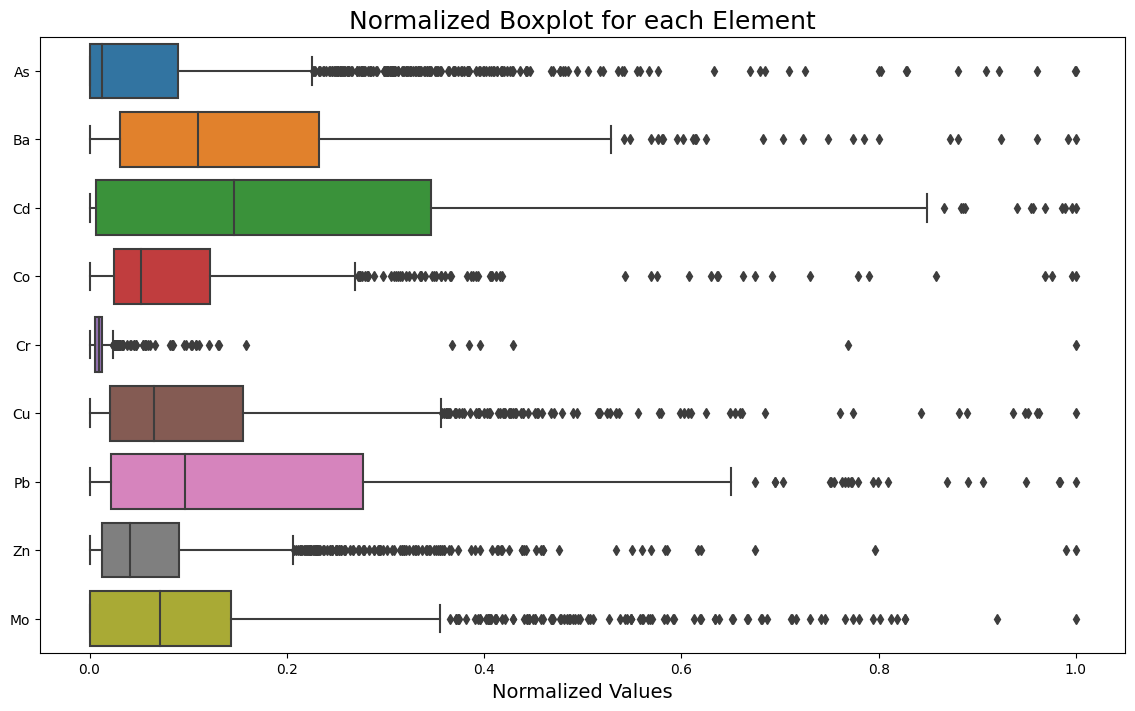

In [4]:
data_plot = data.copy()

scaler = MinMaxScaler(feature_range=(0, 1))
data_plot[columns_to_plot] = scaler.fit_transform(data_plot[columns_to_plot])

ax = sns.boxplot(data=data_plot[columns_to_plot], orient='h')
ax.figure.set_size_inches(14, 8)
ax.set_title('Normalized Boxplot for each Element', fontsize=18)
ax.set_xlabel('Normalized Values', fontsize=14)

ax

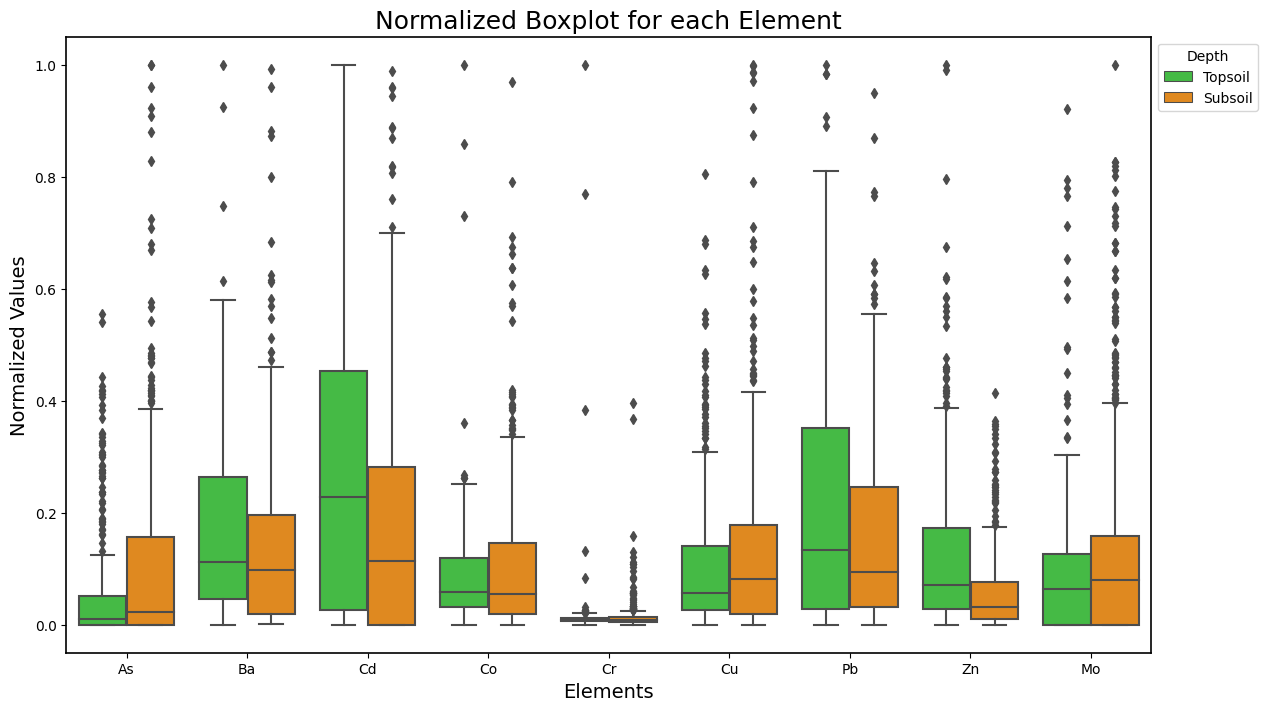

In [48]:
#data = pd.read_csv('K:/Google Drive/DOUTORADO/Tese 2.0/Chapter I/KELLOGs/dataset.csv')
subsoil = pd.read_csv('subsoil.csv', header=None)
topsoil = pd.read_csv('topsoil.csv', header=None)

data['depth'] = 'None'
data.loc[data['id.layer_uuid_c'].isin(subsoil[0]), 'depth'] = 'Subsoil'
data.loc[data['id.layer_uuid_c'].isin(topsoil[0]), 'depth'] = 'Topsoil'
data_depth = data[data['depth'] != 'None']

#for col in columns_to_plot:
#    data = data.sort_values(by=col,ascending=False)
#    data = data[5:]

data_plot = data_depth.copy()

scaler = MinMaxScaler(feature_range=(0, 1))
data_plot[columns_to_plot] = scaler.fit_transform(data_plot[columns_to_plot])

data_melted = pd.melt(data_plot, id_vars=['depth'], value_vars=columns_to_plot, var_name='Variable', value_name='Value')

plt.figure(figsize=(14, 8))
ax = sns.boxplot(data=data_melted, 
                x='Variable', 
                y='Value', 
                hue='depth', 
                orient='v', 
                palette = ["limegreen", "darkorange"],
                hue_order=['Topsoil','Subsoil'])
ax.set_title('Normalized Boxplot for each Element', fontsize=18)
ax.set_ylabel('Normalized Values', fontsize=14)
ax.set_xlabel('Elements', fontsize=14)
plt.legend(title='Depth', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [6]:
descriptive = pd.DataFrame(data[columns_to_plot].describe())
columns = descriptive.index.tolist()
descriptive = descriptive.T.reset_index()
descriptive.columns = ['Elements'] + columns
descriptive.drop(columns=['count','25%','75%'], inplace=True)
descriptive.columns = ['Elements', 'Mean', 'Standard Deviation', 'Minimum', 'Median', 'Maximum']
descriptive = descriptive[['Elements', 'Minimum', 'Median', 'Mean', 'Maximum', 'Standard Deviation']]
descriptive.to_csv('descriptive_analysis.csv')
descriptive

,Elements,Minimum,Median,Mean,Maximum,Standard Deviation
0,As,0.0,0.119102,0.775330,9.158415,1.376636
1,Ba,0.0,52.219825,71.798645,473.588566,70.318361
2,Cd,0.0,0.112647,0.167034,0.768254,0.176320
3,Co,0.0,0.469361,0.831662,8.928518,1.036948
4,Cr,0.0,0.131806,0.203895,14.443822,0.648911
5,Cu,0.0,1.178509,2.091193,18.085914,2.595259
6,Pb,0.0,0.775047,1.345660,8.011357,1.468709
7,Zn,0.0,0.766351,1.484295,18.822067,2.053668
8,Mo,0.0,0.082080,0.133979,1.144700,0.178635


In [7]:
spectra = data[['id.layer_uuid_c'] + list(data.columns[10:-1])]
wavelenghts = list(range(600,4002,2))
spectra.columns = ['id'] + wavelenghts

In [8]:
data.depth.value_counts()

Subsoil    513
Topsoil    428
None       221
Name: depth, dtype: int64

In [9]:
total_spectra = spectra[1:].mean(numeric_only=True)
topsoil_spectra = data[data['depth'] == 'Topsoil']
topsoil_spectra = topsoil_spectra[['id.layer_uuid_c'] + list(topsoil_spectra.columns[10:-1])]
topsoil_spectra.columns = ['id'] + wavelenghts
topsoil_spectra = topsoil_spectra[1:].mean(numeric_only=True)
subsoil_spectra = data[data['depth'] == 'Subsoil']
subsoil_spectra = subsoil_spectra[['id.layer_uuid_c'] + list(subsoil_spectra.columns[10:-1])]
subsoil_spectra.columns = ['id'] + wavelenghts
subsoil_spectra = subsoil_spectra[1:].mean(numeric_only=True)

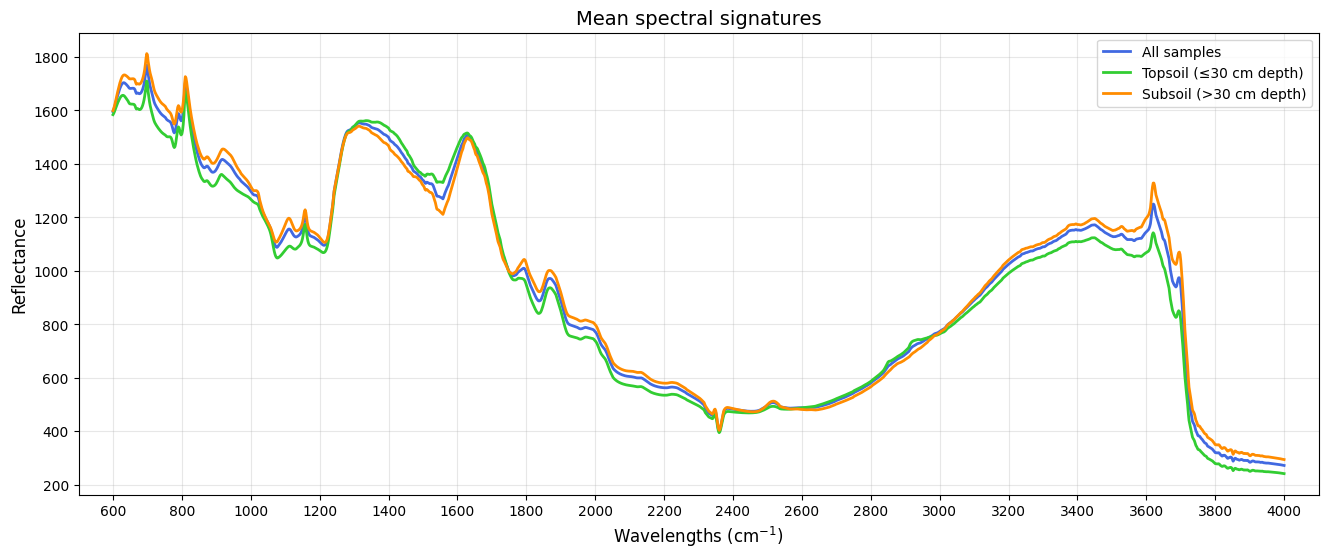

In [10]:
plt.figure(figsize=(16,6))

plt.plot(total_spectra, label='All samples', linewidth=2, color='royalblue')
plt.plot(topsoil_spectra, label='Topsoil (≤30 cm depth)', linewidth=2, color='limegreen')
plt.plot(subsoil_spectra, label='Subsoil (>30 cm depth)', linewidth=2, color='darkorange')

plt.xlabel('Wavelengths (cm$^{-1}$)', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.title('Mean spectral signatures', fontsize=14)
plt.xlim(500,4100)

plt.legend()

plt.rcParams['axes.linewidth'] = 1.2
x_ticks = range(600, 4199, 200)
plt.xticks(x_ticks)
plt.grid(True, linestyle='-', alpha=0.3)

plt.show()

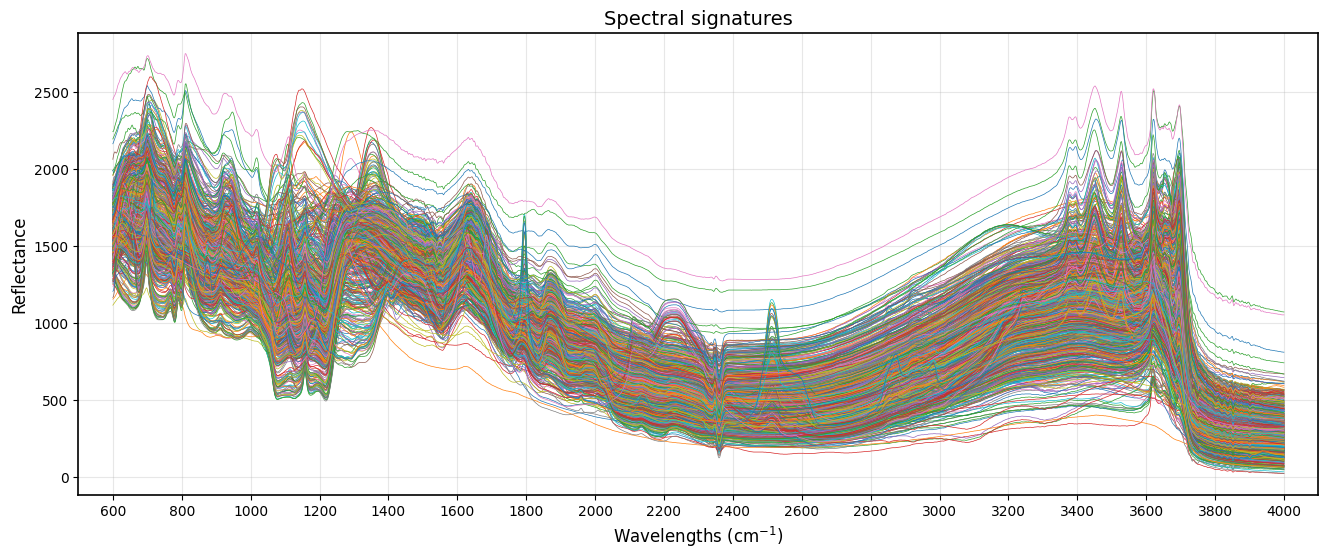

In [11]:
plt.figure(figsize=(16,6))

for index, row in spectra.iloc[:,1:].astype(float).iterrows():
    plt.plot(row, linewidth=0.5)

plt.xlabel('Wavelengths (cm$^{-1}$)', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.title('Spectral signatures', fontsize=14)
plt.xlim(500,4100)

plt.rcParams['axes.linewidth'] = 1.2
x_ticks = range(600, 4199, 200)
plt.xticks(x_ticks)
plt.grid(True, linestyle='-', alpha=0.3)

plt.show()

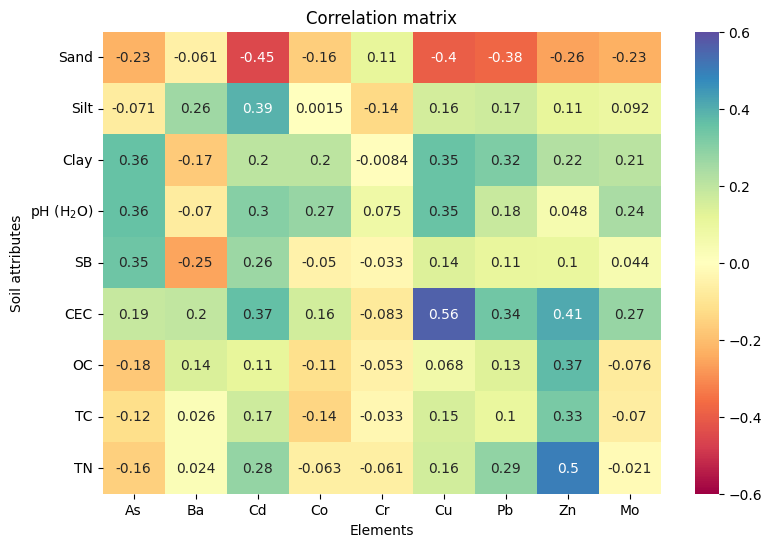

In [12]:
correlation = filter_data.dropna().corr(numeric_only=True).iloc[:14,14:]

correlation.columns = ['As', 'Ba', 'Cd', 'Co', 'Cr', 'Cu', 'Pb', 'Zn', 'Mo']
correlation.index = ['TC','CEC','Sand','Silt','Clay','OC','Mg','SB','TN', 'pH (H$_2$O)','pH (CaCl$_2$)','K','Na','S']
correlation.drop(index=['Mg','K','Na','S','pH (CaCl$_2$)'], inplace=True)
correlation = correlation.reindex(['Sand','Silt','Clay','pH (H$_2$O)','SB','CEC','OC','TC','TN'])

plt.figure(figsize=(9,6))

sns.heatmap(correlation, vmin=-0.6, vmax=0.6, annot=True, cmap='Spectral')

plt.yticks(rotation=0) 
plt.title('Correlation matrix')
plt.xlabel('Elements', fontsize=10)
plt.ylabel('Soil attributes', fontsize=10)

plt.show()

In [71]:
attributes = filter_data.dropna().iloc[:,1:15]
attributes.columns = [#'id.layer_uuid_c',
    'TC','CEC','Sand','Silt','Clay','OC','Mg','SB','TN', 'pH (H$_2$O)','pH (CaCl$_2$)','K','Na','S']

attributes = attributes[['Sand','Silt','Clay','pH (H$_2$O)','SB','CEC','OC','TC','TN']].describe()
columns = attributes.index.tolist()
attributes = attributes.T.reset_index()
attributes.columns = ['Attributes'] + columns
attributes.drop(columns=['count','25%','75%'], inplace=True)
attributes.columns = ['Attributes', 'Mean', 'Standard Deviation', 'Minimum', 'Median', 'Maximum']
soil_attributes = attributes[['Attributes', 'Minimum', 'Median', 'Mean', 'Maximum', 'Standard Deviation']]
soil_attributes.to_csv('soil_attributes.csv')
#soil_attributes

In [72]:
attributes = filter_data.loc[filter_data['id.layer_uuid_c'].isin(topsoil[0])].dropna().iloc[:,1:15]
attributes.columns = [#'id.layer_uuid_c',
    'TC','CEC','Sand','Silt','Clay','OC','Mg','SB','TN', 'pH (H$_2$O)','pH (CaCl$_2$)','K','Na','S']

attributes = attributes[['Sand','Silt','Clay','pH (H$_2$O)','SB','CEC','OC','TC','TN']].describe()
columns = attributes.index.tolist()
attributes = attributes.T.reset_index()
attributes.columns = ['Attributes'] + columns
attributes.drop(columns=['count','25%','75%'], inplace=True)
attributes.columns = ['Attributes', 'Mean', 'Standard Deviation', 'Minimum', 'Median', 'Maximum']
topsoil_attributes = attributes[['Attributes', 'Minimum', 'Median', 'Mean', 'Maximum', 'Standard Deviation']]
topsoil_attributes.to_csv('topsoil_attributes.csv')
#topsoil_attributes

In [73]:
attributes = filter_data.loc[filter_data['id.layer_uuid_c'].isin(subsoil[0])].dropna().iloc[:,1:15]
attributes.columns = [#'id.layer_uuid_c',
    'TC','CEC','Sand','Silt','Clay','OC','Mg','SB','TN', 'pH (H$_2$O)','pH (CaCl$_2$)','K','Na','S']

attributes = attributes[['Sand','Silt','Clay','pH (H$_2$O)','SB','CEC','OC','TC','TN']].describe()
columns = attributes.index.tolist()
attributes = attributes.T.reset_index()
attributes.columns = ['Attributes'] + columns
attributes.drop(columns=['count','25%','75%'], inplace=True)
attributes.columns = ['Attributes', 'Mean', 'Standard Deviation', 'Minimum', 'Median', 'Maximum']
subsoil_attributes = attributes[['Attributes', 'Minimum', 'Median', 'Mean', 'Maximum', 'Standard Deviation']]
subsoil_attributes.to_csv('subsoil_attributes.csv')
#subsoil_attributes

In [74]:
all_attributes = pd.concat([soil_attributes, 
                            topsoil_attributes.drop(columns=['Attributes']), 
                            subsoil_attributes.drop(columns=['Attributes'])], 
                           axis=1)
all_attributes.columns = (['Attributes','Min','Median','Mean','Max','SD',
                                       'Min','Median','Mean','Max','SD',
                                       'Min','Median','Mean','Max','SD'])

all_attributes.to_csv('all_attributes.csv', index=False)

#all_attributes.round(2)

In [76]:
data['depth'].value_counts()

Subsoil    513
Topsoil    428
None       221
Name: depth, dtype: int64